In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
cd /content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/preprocessed_data

/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/preprocessed_data


In [5]:
df = pd.read_csv('Gil_pop_data.csv', index_col='Datetime', parse_dates=True)

In [6]:
df.describe()

,population
count,8760.000000
mean,55602.532042
std,2490.600894
min,47131.157800
25%,53582.432800
50%,56065.952950
75%,57526.598250
max,60644.440600


In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
len_month = 744 #한달치 데이터 길이
len_week = 168 #일주일치 데이터 길이
len_day = 24 #하루치 데이터 길이

In [9]:
len(df)

8760

In [10]:
train = df.iloc[:-len_month]  #test 데이터셋:8016
test = df.iloc[-len_month:] #train 데이터셋: 744 (한달치 data)

In [11]:
 #데이터 scaling
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
pd.DataFrame(scaled_train, index = train.index, columns=train.columns)

,population
Datetime,
2022-09-01 00:00:00,0.715604
2022-09-01 01:00:00,0.686079
2022-09-01 02:00:00,0.685912
2022-09-01 03:00:00,0.659669
2022-09-01 04:00:00,0.648062
...,...
2023-07-31 19:00:00,0.681694
2023-07-31 20:00:00,0.696117
2023-07-31 21:00:00,0.677302


In [13]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [14]:
scaled_train = scaled_train.reshape(-1)
scaled_test = scaled_test.reshape(-1)
print(scaled_train.shape)
print(scaled_test.shape)

(8016,)
(744,)


In [15]:
n_steps = len_day #일주일치 데이터
n_features = 1  #단변량 데이터

x_train, y_train = split_sequence(scaled_train, n_steps) #x_train = (7848,168), y_train = (7848,1)
x_test, y_test = split_sequence(scaled_test, n_steps) #x_test = (576,168), y_test = (576,1)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7992 7992
720 720


In [16]:
pd.DataFrame(x_train.T,
             index = [f'day{x+1}' for x in range(x_train.shape[1])],
             columns = [f'input_{x+1}' for x in range(x_train.shape[0])])

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,...,input_7983,input_7984,input_7985,input_7986,input_7987,input_7988,input_7989,input_7990,input_7991,input_7992
day1,0.715604,0.686079,0.685912,0.659669,0.648062,0.590816,0.530056,0.386583,0.304186,0.279876,...,0.613059,0.655156,0.697656,0.658843,0.649646,0.645397,0.638925,0.603420,0.621254,0.766953
day2,0.686079,0.685912,0.659669,0.648062,0.590816,0.530056,0.386583,0.304186,0.279876,0.290201,...,0.655156,0.697656,0.658843,0.649646,0.645397,0.638925,0.603420,0.621254,0.766953,0.766010
day3,0.685912,0.659669,0.648062,0.590816,0.530056,0.386583,0.304186,0.279876,0.290201,0.324568,...,0.697656,0.658843,0.649646,0.645397,0.638925,0.603420,0.621254,0.766953,0.766010,0.752369
day4,0.659669,0.648062,0.590816,0.530056,0.386583,0.304186,0.279876,0.290201,0.324568,0.268911,...,0.658843,0.649646,0.645397,0.638925,0.603420,0.621254,0.766953,0.766010,0.752369,0.747554
day5,0.648062,0.590816,0.530056,0.386583,0.304186,0.279876,0.290201,0.324568,0.268911,0.244219,...,0.649646,0.645397,0.638925,0.603420,0.621254,0.766953,0.766010,0.752369,0.747554,0.753179
day6,0.590816,0.530056,0.386583,0.304186,0.279876,0.290201,0.324568,0.268911,0.244219,0.256192,...,0.645397,0.638925,0.603420,0.621254,0.766953,0.766010,0.752369,0.747554,0.753179,0.739886
day7,0.530056,0.386583,0.304186,0.279876,0.290201,0.324568,0.268911,0.244219,0.256192,0.257003,...,0.638925,0.603420,0.621254,0.766953,0.766010,0.752369,0.747554,0.753179,0.739886,0.689016
day8,0.386583,0.304186,0.279876,0.290201,0.324568,0.268911,0.244219,0.256192,0.257003,0.340319,...,0.603420,0.621254,0.766953,0.766010,0.752369,0.747554,0.753179,0.739886,0.689016,0.611751
day9,0.304186,0.279876,0.290201,0.324568,0.268911,0.244219,0.256192,0.257003,0.340319,0.418483,...,0.621254,0.766953,0.766010,0.752369,0.747554,0.753179,0.739886,0.689016,0.611751,0.524177
day10,0.279876,0.290201,0.324568,0.268911,0.244219,0.256192,0.257003,0.340319,0.418483,0.477967,...,0.766953,0.766010,0.752369,0.747554,0.753179,0.739886,0.689016,0.611751,0.524177,0.376861


In [17]:
pd.DataFrame(y_train.T,
             index = [f'output_{x+1}' for x in range(y_train.shape[0])],
             columns = [f'day1'])

,day1
output_1,0.722994
output_2,0.700936
output_3,0.707887
output_4,0.675782
output_5,0.665147
...,...
output_7988,0.681694
output_7989,0.696117
output_7990,0.677302
output_7991,0.705622


In [18]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps,n_features))) #first layer
model.add(Dropout(0.5))

model.add(LSTM(units = 64)) #second layer
model.add(Dropout(0.5))

model.add(Dense(1)) #output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
#모델의 val_loss가 10epoch 동안 동일하면 학습을 중단

history = model.fit(x_train, y_train, epochs=30, callbacks=[early_stopping])

Epoch 1/30
250/250 [==============================] - 22s 53ms/step - loss: 0.0339 - mae: 0.1436
Epoch 2/30
250/250 [==============================] - 14s 54ms/step - loss: 0.0141 - mae: 0.0942
Epoch 3/30
250/250 [==============================] - 12s 50ms/step - loss: 0.0116 - mae: 0.0855
Epoch 4/30
250/250 [==============================] - 12s 50ms/step - loss: 0.0099 - mae: 0.0784
Epoch 5/30
250/250 [==============================] - 12s 50ms/step - loss: 0.0087 - mae: 0.0734
Epoch 6/30
250/250 [==============================] - 12s 49ms/step - loss: 0.0081 - mae: 0.0708
Epoch 7/30
250/250 [==============================] - 13s 51ms/step - loss: 0.0072 - mae: 0.0669
Epoch 8/30
250/250 [==============================] - 13s 51ms/step - loss: 0.0066 - mae: 0.0636
Epoch 9/30
250/250 [==============================] - 12s 49ms/step - loss: 0.0061 - mae: 0.0613
Epoch 10/30
250/250 [==============================] - 11s 45ms/step - loss: 0.0056 - mae: 0.0586
Epoch 11/30
250/250 [========

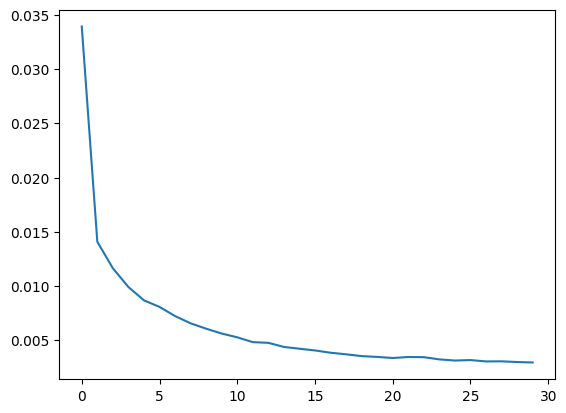

In [21]:
import matplotlib.pyplot as plt
myloss = model.history.history['loss']
plt.plot(range(len(myloss)), model.history.history['loss'])

In [22]:
import math
from sklearn.metrics import mean_squared_error

In [23]:
# tratrainPredict = scaler.inverse_transform(trainPredict)
#train값과 test값 예측
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

# 역정규화 과정
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# rmse 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

23/23 [==============================] - 0s 6ms/step
Train Score: 590.09 RMSE
Test Score: 562.38 RMSE


<Axes: xlabel='Datetime'>

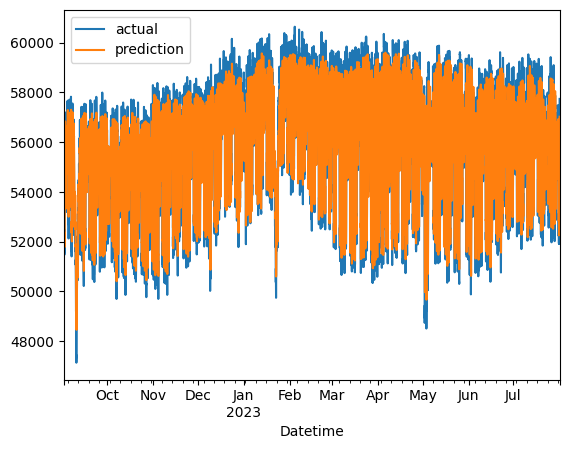

In [24]:
val_train  = pd.DataFrame() #예측값 검증을 위한 df 생성

trainPredict = pd.DataFrame(trainPredict)
trainPredict.index = train[-len(trainPredict):].index #실제 test 범위에 해당하는 index 매칭

val_train['actual'] = train[-len(trainPredict):] #실제 값 할당
val_train['prediction'] = trainPredict #예측한 값 할당

val_train.plot()

In [25]:
len(val_train)

7992

<Axes: xlabel='Datetime'>

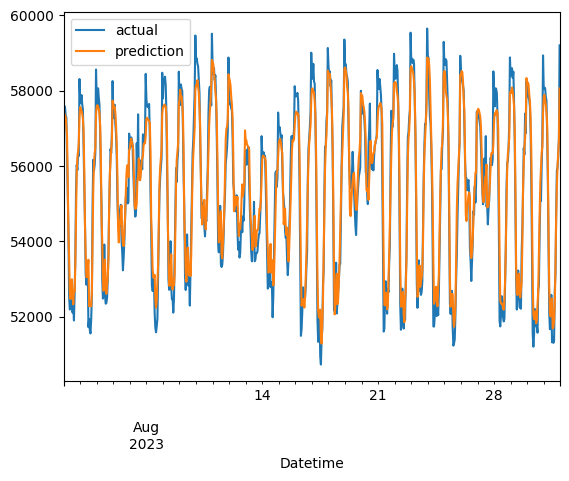

In [26]:
val_test = pd.DataFrame() #예측값 검증을 위한 df 생성

testPredict = pd.DataFrame(testPredict)
testPredict.index = test[-len(testPredict):].index #실제 test 범위에 해당하는 index 매칭

val_test['actual'] = test[-len(testPredict):] #실제 값 할당
val_test['prediction'] = testPredict #예측한 값 할당

val_test.plot()

In [27]:
from keras.models import load_model
model.save("gil_model.h5")